# Import necessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, roc_auc_score
from itertools import cycle

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Parameters

In [3]:
IMAGE_H, IMAGE_W = 350, 350
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50
CLASSES = ['Bacterial leaf blight', 'Brown spot', 'Healthy', 'Hispa', 'Leaf smut', 'LeafBlast']

# Data Augmentation

In [4]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30
)

train_gen = datagen.flow_from_directory(
    r"G:\Rice_leaf_disease_detection_using_CNN\6 class dataset\dataset", # Replace with dataset path
    target_size=(IMAGE_H, IMAGE_W),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    r"G:\Rice_leaf_disease_detection_using_CNN\6 class dataset\dataset", # Replace with dataset path
    target_size=(IMAGE_H, IMAGE_W),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


class_names = list(train_gen.class_indices.keys())
print(class_names)


Found 1251 images belonging to 6 classes.
Found 312 images belonging to 6 classes.
['Bacterial leaf blight', 'Brown spot', 'Healthy', 'Hispa', 'Leaf Blast', 'Leaf smut']


# Model architecture with 5 convolutional layers

In [5]:
model = Sequential([
    Input(shape=(350, 350, 3)),  # Specify input shape
    Conv2D(32, (3, 3), activation='relu'),  # Convolutional layer
    MaxPooling2D(pool_size=(2, 2)),         # Pooling layer
    Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),  # Convolutional layer
    MaxPooling2D(pool_size=(2, 2)),# Pooling layer
    Flatten(),                              # Flatten to 1D
    Dense(128, activation='relu'),          # Fully connected layer
    Dense(len(CLASSES), activation='softmax')         # Output layer (adjust for your classes)
])



In [6]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 174, 174, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 172, 172, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 86, 86, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 84, 84, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 42, 42, 128)      0

# Training the model

In [8]:
history = model.fit(train_gen, 
                    validation_data=val_gen,
                    epochs=EPOCHS)

Epoch 1/50
40/40 [==============================] - 188s 4s/step - loss: 1.8971 - accuracy: 0.3333 - val_loss: 2.6439 - val_accuracy: 0.1250
Epoch 2/50
40/40 [==============================] - 79s 2s/step - loss: 1.3754 - accuracy: 0.4045 - val_loss: 2.3527 - val_accuracy: 0.2532
Epoch 3/50
40/40 [==============================] - 78s 2s/step - loss: 1.3053 - accuracy: 0.4380 - val_loss: 2.4120 - val_accuracy: 0.2019
Epoch 4/50
40/40 [==============================] - 78s 2s/step - loss: 1.2295 - accuracy: 0.4732 - val_loss: 1.8284 - val_accuracy: 0.3654
Epoch 5/50
40/40 [==============================] - 78s 2s/step - loss: 1.1631 - accuracy: 0.4924 - val_loss: 1.9171 - val_accuracy: 0.3333
Epoch 6/50
40/40 [==============================] - 78s 2s/step - loss: 1.2039 - accuracy: 0.4884 - val_loss: 1.6128 - val_accuracy: 0.4455
Epoch 7/50
40/40 [==============================] - 115s 3s/step - loss: 1.1316 - accuracy: 0.5092 - val_loss: 1.6344 - val_accuracy: 0.4455
Epoch 8/50
40/40 [

# Plot training and validation accuracy/loss

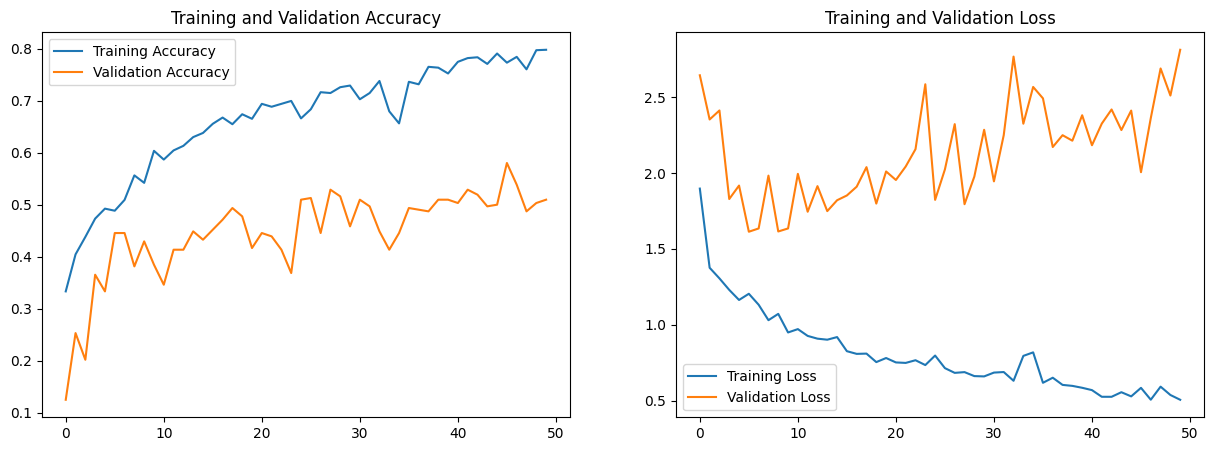

In [9]:
def plot_training_history(history):
    epochs_range = range(len(history.history['accuracy']))
    plt.figure(figsize=(15, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, history.history['loss'], label='Training Loss')
    plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

plot_training_history(history)

# Evaluate the model and make predictions

In [10]:
val_gen.reset()  # Reset the generator to ensure no data is skipped
y_true = val_gen.classes  # True labels
y_pred_prob = model.predict(val_gen)  # Predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Predicted labels

10/10 [==============================] - 17s 2s/step


# Classification report

In [11]:
print("\nClassification Report:\n")
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
print(classification_report(y_true, y_pred, target_names=class_names))



Classification Report:

                       precision    recall  f1-score   support

Bacterial leaf blight       0.92      0.80      0.85        59
           Brown spot       0.37      0.52      0.43        50
              Healthy       0.37      0.26      0.31        50
                Hispa       0.45      0.80      0.58        50
           Leaf Blast       0.29      0.12      0.17        50
            Leaf smut       0.56      0.47      0.51        53

             accuracy                           0.50       312
            macro avg       0.49      0.49      0.47       312
         weighted avg       0.50      0.50      0.49       312



# Accuracy metrics

In [12]:
accuracy = report['accuracy']
macro_avg = report['macro avg']
weighted_avg = report['weighted avg']

print(f"Overall Accuracy: {accuracy:.3f}")
print(f"Macro Average: {macro_avg}")
print(f"Weighted Average: {weighted_avg}")

Overall Accuracy: 0.503
Macro Average: {'precision': 0.491650404249196, 'recall': 0.4947180471165122, 'f1-score': 0.4741562680145588, 'support': 312.0}
Weighted Average: {'precision': 0.5046663640656548, 'recall': 0.5032051282051282, 'f1-score': 0.48547564660312403, 'support': 312.0}


# Confusion matrix

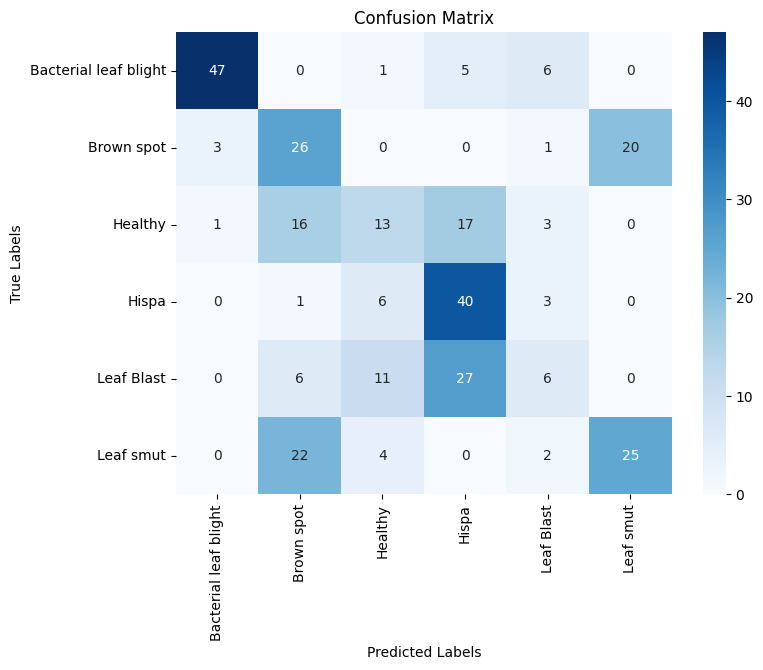

In [13]:
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# ROC and AUC calculation

In [14]:
y_true_onehot = tf.keras.utils.to_categorical(y_true, num_classes=len(class_names))
fpr = {}
tpr = {}
roc_auc = {}

for i, class_name in enumerate(class_names):
    fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Average AUC

In [16]:
average_auc = np.mean(list(roc_auc.values()))
print(f'Average AUC: {average_auc:.3f}')


Average AUC: 0.763


# Plot ROC curves

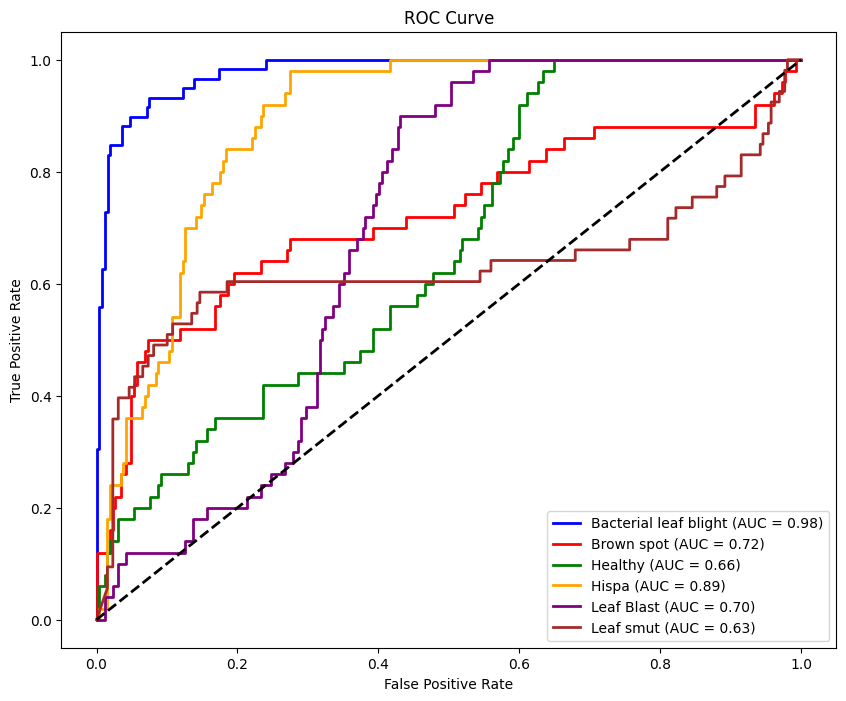

In [17]:
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown'])
for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [18]:
model.save('from_chatgpt.h5')

# predict for new image

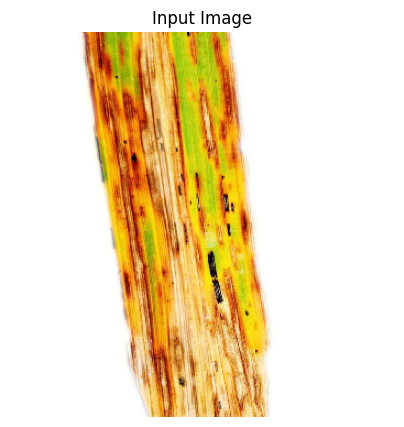

1/1 [==============================] - 0s 72ms/step
Image: G:/Rice_leaf_disease_detection_using_CNN/6 class dataset/RiceLeafsDisease/train/narrow_brown_spot/narrow_brown (5).jpg
Predicted Class: Brown spot
Confidence: 100.00%
Prediction vector: [3.8892040e-10 1.0000000e+00 1.1943449e-21 9.6313270e-25 4.6820226e-18
 2.6920050e-14]


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tkinter import Tk, filedialog

model_path = r"G:\Rice_leaf_disease_detection_using_CNN\mridul da analysis\adam0.001copied\perfectly predicting model\rice_disease_ detection_ webpage\this is just a demo for a webpage\Rice disease detection webpage\from_chatgpt.h5"
model = load_model(model_path)
#class_names = ['Bacterial leaf blight', 'Brown spot', 'Healthy', 'Hispa', 'Leaf Blast', 'Leaf smut']

Tk().withdraw()  # Hide the root window
image_path = filedialog.askopenfilename(title="Select an Image", filetypes=[("Image Files", "*.jpg *.jpeg *.png")])

def predict_rice_disease(image_path, model, classes, image_h=350, image_w=350):
    img = load_img(image_path, target_size=(image_h, image_w))
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Input Image")
    plt.show()

    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    confidence_scores = predictions[0]
    predicted_class_index = np.argmax(confidence_scores)
    predicted_class = classes[predicted_class_index]
    confidence_percentage = confidence_scores[predicted_class_index] * 100

    return predicted_class, confidence_percentage, predictions

predicted_class, confidence_percentage, predictions = predict_rice_disease(image_path, model, class_names)

print(f"Image: {image_path}")
print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence_percentage:.2f}%")
print("Prediction vector:", predictions[0])


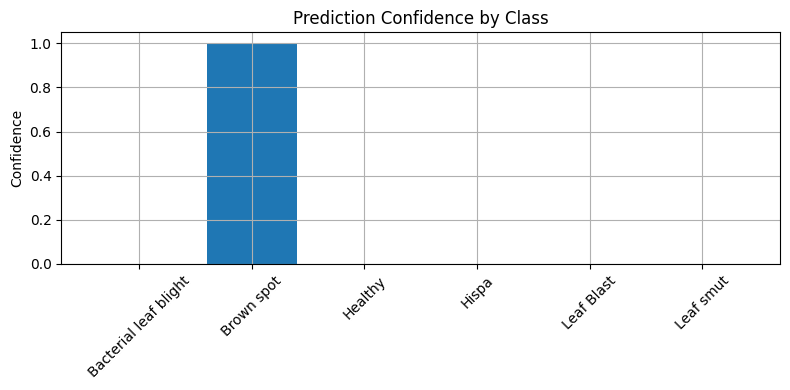

In [37]:
import matplotlib.pyplot as plt

# Plot probabilities
plt.figure(figsize=(8, 4))
plt.bar(class_names, predictions[0])
plt.xticks(rotation=45)
plt.title("Prediction Confidence by Class")
plt.ylabel("Confidence")
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
import tensorflow as tf
import os

# Path to your existing .h5 model
h5_model_path = r"G:\Rice_leaf_disease_detection_using_CNN\from_chatgpt.h5"

# Load the .h5 model
model = tf.keras.models.load_model(h5_model_path)

# Convert to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Output path where you want to save the .tflite model
output_path = r"G:\Rice_leaf_disease_detection_using_CNN\various models\final_project\app\src\main\assets\our_model.tflite"

# Make sure the directory exists
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Save the converted model
with open(output_path, 'wb') as f:
    f.write(tflite_model)

print(f"TFLite model saved to: {output_path}")


INFO:tensorflow:Assets written to: C:\Users\subham\AppData\Local\Temp\tmpxisduu2n\assets


INFO:tensorflow:Assets written to: C:\Users\subham\AppData\Local\Temp\tmpxisduu2n\assets


TFLite model saved to: G:\Rice_leaf_disease_detection_using_CNN\various models\final_project\app\src\main\assets\our_model.tflite
